# 🩺 Diabetes Risk Classification Analysis & Reporting

This notebook follows the automobile analysis structure, adapted for classification of diabetes risk using health indicators. It includes categorical encoding, feature engineering, outlier control, and correlation insights.

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
path = '/media/akashs/FA22E72622E6E69B/DATA1_disk/ACADEMICS/3_IPCS_Works/'
df = pd.read_csv(path+'./data/Diabetes Classification.csv')
df.head()


Age  Gender  BMI Blood Pressure  FBS  HbA1c Family History of Diabetes  \
0   45    Male   25         Normal  100    5.7                         No   
1   55  Female   30           High  120    6.4                        Yes   
2   65    Male   35           High  140    7.1                        Yes   
3   75  Female   40           High  160    7.8                        Yes   
4   40    Male   20         Normal   80    5.0                         No   

  Smoking     Diet Exercise Diagnosis  
0      No  Healthy  Regular        No  
1     Yes     Poor       No       Yes  
2     Yes     Poor       No       Yes  
3     Yes     Poor       No       Yes  
4      No  Healthy  Regular        No

## 🧹 Data Cleaning & Preparation

In [2]:

# Encode categorical variables
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Blood Pressure'] = df['Blood Pressure'].map({'Normal': 0, 'High': 1})
df['Family History of Diabetes'] = df['Family History of Diabetes'].map({'Yes': 1, 'No': 0})
df['Smoking'] = df['Smoking'].map({'Yes': 1, 'No': 0})
df['Diet'] = df['Diet'].map({'Poor': 0, 'Healthy': 1})
df['Exercise'] = df['Exercise'].map({'No': 0, 'Regular': 1})
df['Diagnosis'] = df['Diagnosis'].map({'Yes': 1, 'No': 0})


## 🛠️ Feature Engineering

In [3]:

# Create BMI Risk Category
df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 25, 30, 100],
                            labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Interaction: Age x FBS
df['Age_FBS'] = df['Age'] * df['FBS']

# Convert new categorical feature
df = pd.get_dummies(df, columns=['BMI_Category'], drop_first=True)


## 📊 Outlier Visualization (Boxplots)

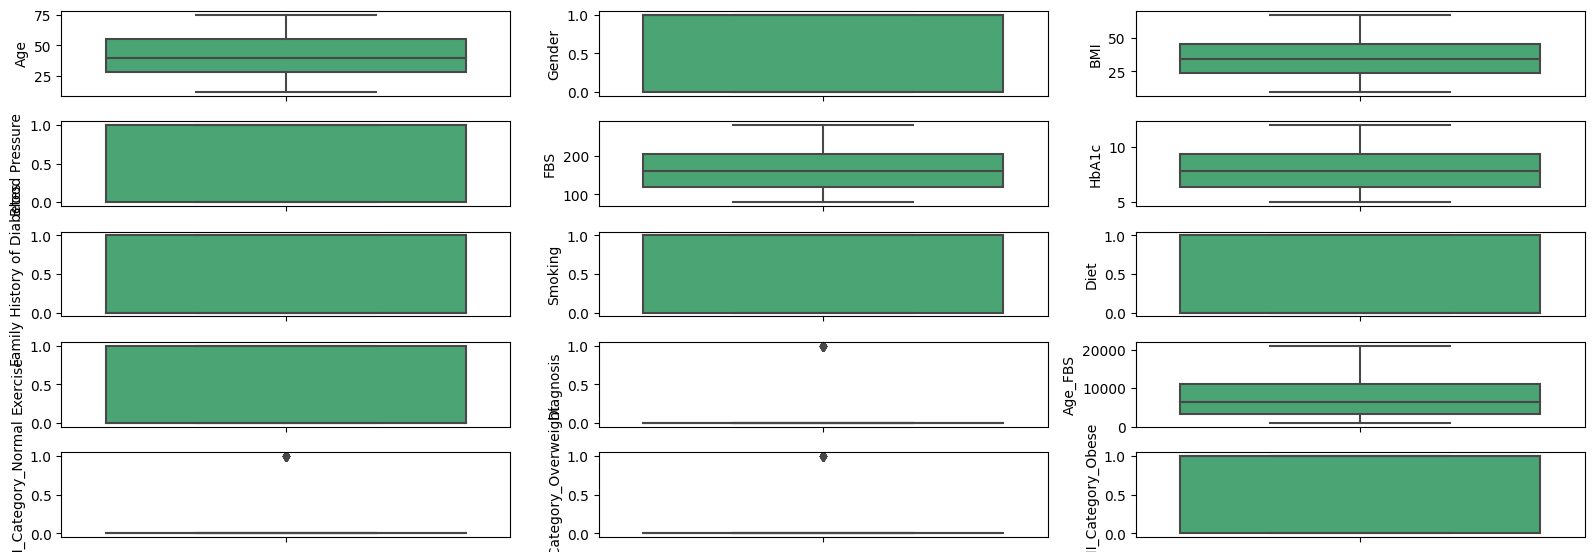

In [4]:

fig = plt.figure(figsize=(16, 10))
for i in enumerate (df):
    plt.subplot(9,3,i[0]+1)
    sns.boxplot(y= i[1],data = df , color='#3CB371')
    # plt.title(col)
plt.tight_layout()
plt.show()


## 🔍 Outlier Handling with Winsorization

In [5]:

from scipy import stats

# Outlier removal using Z-score method on selected numerical columns
# numeric_cols = ['price', 'horsepower', 'engine-size', 'curb-weight']
numeric_cols = df.select_dtypes(include=['number']).columns.drop('Diagnosis')

# Z-Score
# # df = df[(np.abs(stats.zscore(df.select_dtypes(include=['number']).columns)) < 3).all(axis=1)]
# df = df[(np.abs(stats.zscore(df.select_dtypes(include=['number']))) < 3).all(axis=1)]

# Winsorization (or capping)
# df[df.select_dtypes(include='number').columns] = df.select_dtypes(include='number').apply(lambda x: x.clip(lower=x.quantile(0.25), upper=x.quantile(0.75)))
# df[numeric_cols] = df[numeric_cols].apply(lambda x: x.clip(lower=x.quantile(0.25), upper=x.quantile(0.75)))

for column in numeric_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    Maximum = Q3 + 1.5 * IQR
    Minimum = Q1 - 1.5 * IQR
    df[column] = df[column].clip(lower=Minimum, upper=Maximum)


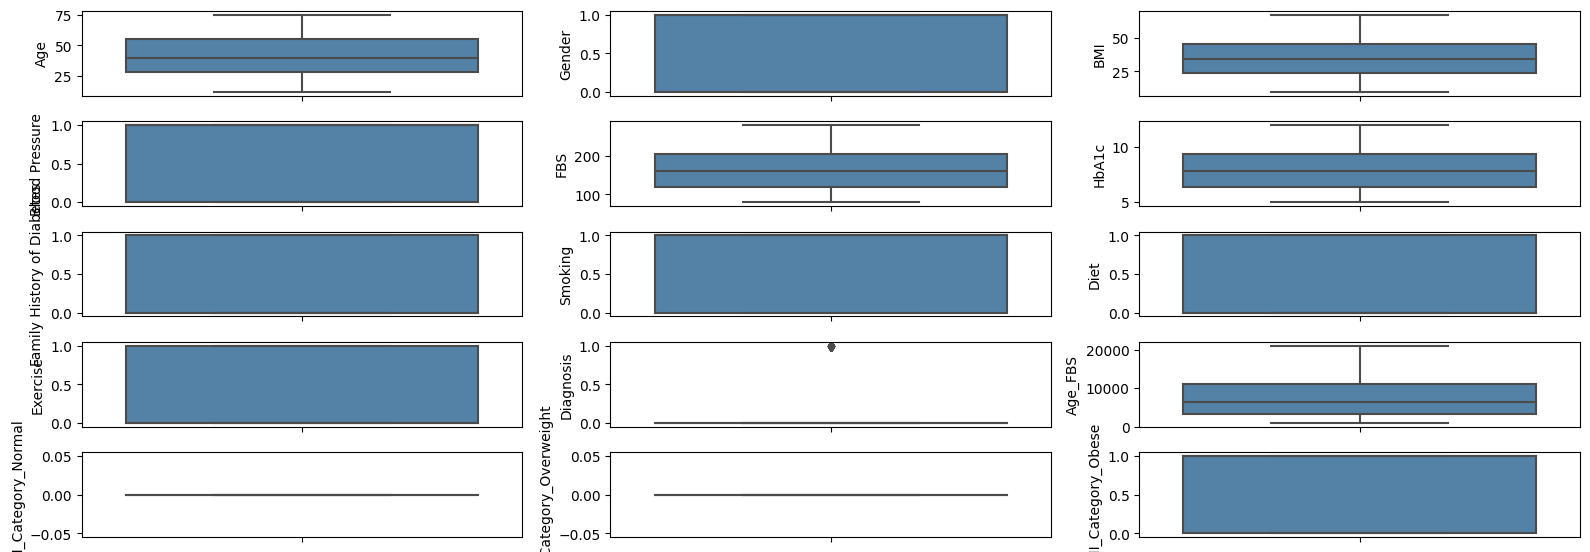

In [6]:


fig = plt.figure(figsize=(16, 10))
for i in enumerate (df):
    plt.subplot(9,3,i[0]+1)
    sns.boxplot(y= i[1],data = df , color='#4682B4')
    # plt.title(col)
plt.tight_layout()
plt.show()


## 📊 Initial Correlation Heatmap

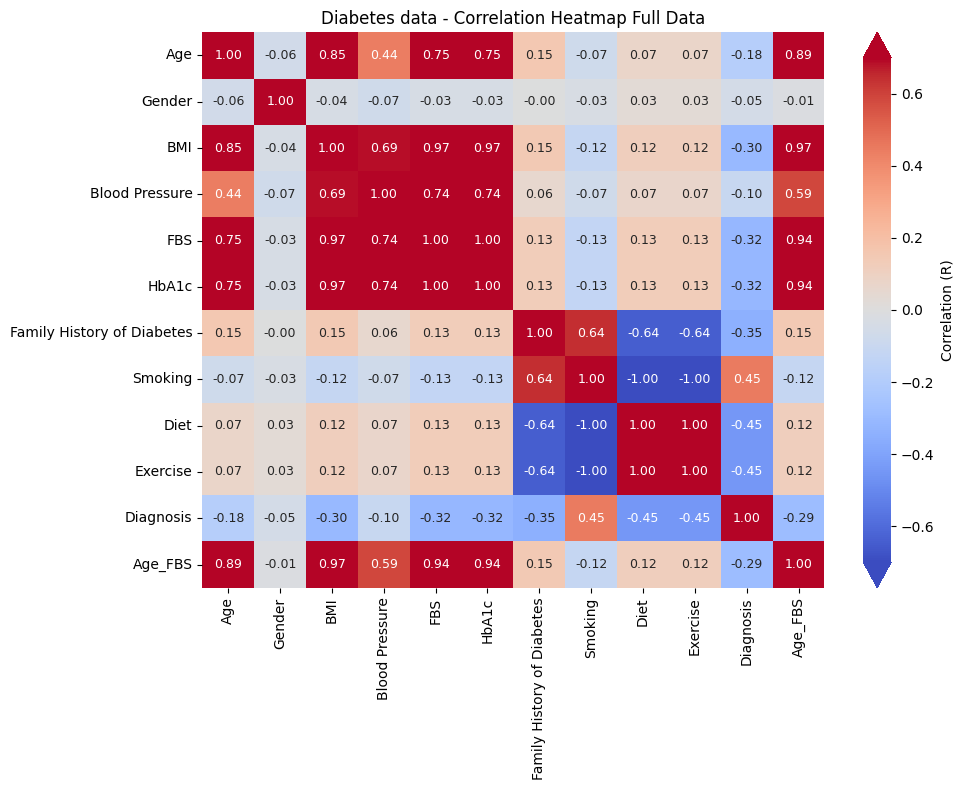

In [7]:

# plt.figure(figsize=(10, 8))
# sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm', vmin=-0.7, vmax=0.7, extend='both')
# plt.title("Correlation Heatmap")
# plt.show()


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Compute correlation matrix
corr = df.drop(columns=['BMI_Category_Normal', 'BMI_Category_Overweight', 'BMI_Category_Obese']).corr(numeric_only=True)


# Set up the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Draw the heatmap without the colorbar
norm = plt.Normalize(vmin=-0.7, vmax=0.7)
cmap = plt.get_cmap('coolwarm')

heatmap = sns.heatmap(
    corr,
    annot=True,
    fmt='.2f',
    cmap=cmap,
    norm=norm,
    cbar=False,  # we will add it manually
    ax=ax,
    annot_kws={"size": 9},
)

# Manually add a colorbar with extend arrows
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=ax, extend='both')
cbar.set_label('Correlation (R)')

# 🔧 Remove black border around the colorbar
for spine in cbar.ax.spines.values():
    spine.set_visible(False)
    
plt.title('Diabetes data - Correlation Heatmap Full Data')
# plt.savefig('./plots/diabetes_correlation_heatmap_full_data.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()



## 🎯 Focused Correlation Heatmap (Highly Correlated Features Only)

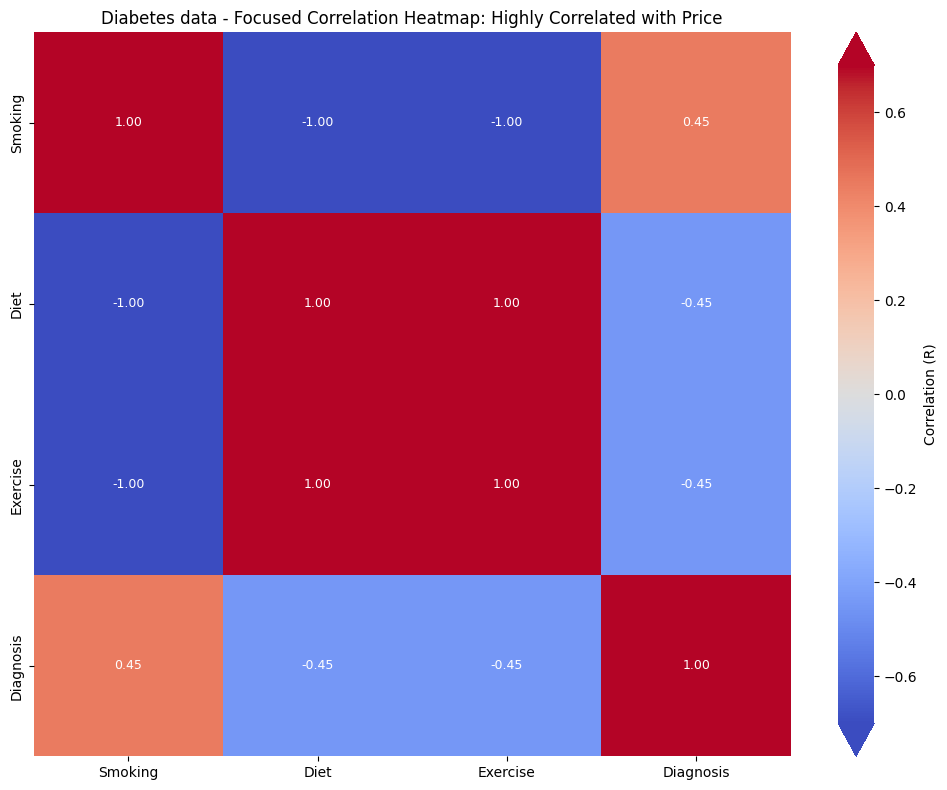

In [8]:

# Find highly correlated features with price using manual correlation filtering
high_corr_colms = []
for col in df.select_dtypes(include=[np.number]).columns:
    if col != 'Diagnosis':
        corr = df['Diagnosis'].corr(df[col])
        if corr > 0.4 or corr < -0.4:
            high_corr_colms.append(col)
high_corr_colms.append('Diagnosis')  # include target variable

# # Plot heatmap for selected features
# plt.figure(figsize=(10, 7))
# sns.heatmap(df[high_corr_colms].corr(), annot=True, cmap='YlOrRd')
# plt.title("Focused Correlation Heatmap: Highly Correlated with Price")
# plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Draw the heatmap without the colorbar
norm = plt.Normalize(vmin=-0.7, vmax=0.7)
cmap = plt.get_cmap('coolwarm')

heatmap = sns.heatmap(
    df[high_corr_colms].corr(numeric_only=True),
    annot=True,
    fmt='.2f',
    cmap=cmap,
    norm=norm,
    cbar=False,  # we will add it manually
    ax=ax,
    annot_kws={"size": 9},
)

# Manually add a colorbar with extend arrows
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=ax, extend='both')
cbar.set_label('Correlation (R)')

# 🔧 Remove black border around the colorbar
for spine in cbar.ax.spines.values():
    spine.set_visible(False)
    
plt.title('Diabetes data - Focused Correlation Heatmap: Highly Correlated with Price')
# plt.savefig('./plots/diabetes_correlation_heatmap_high_corrs.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

## 🔁 Refined Correlation Heatmap with Engineered Features

In [9]:
df.columns

Index(['Age', 'Gender', 'BMI', 'Blood Pressure', 'FBS', 'HbA1c',
       'Family History of Diabetes', 'Smoking', 'Diet', 'Exercise',
       'Diagnosis', 'Age_FBS', 'BMI_Category_Normal',
       'BMI_Category_Overweight', 'BMI_Category_Obese'],
      dtype='object')

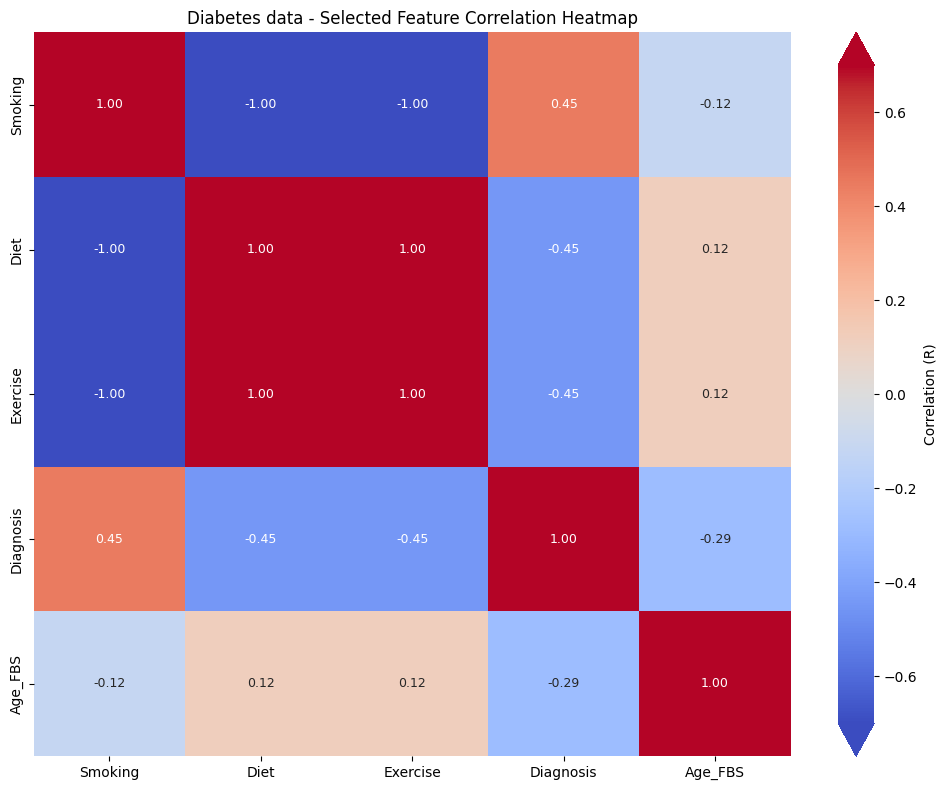

In [10]:

selected_cols = ['Smoking', 'Diet', 'Exercise',
       'Diagnosis', 'Age_FBS']


# plt.figure(figsize=(10, 7))
# sns.heatmap(df[selected_cols].corr(), annot=True, fmt='.2f', cmap='YlGnBu')
# plt.title("Selected Feature Correlation Heatmap")
# plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Draw the heatmap without the colorbar
norm = plt.Normalize(vmin=-0.7, vmax=0.7)
cmap = plt.get_cmap('coolwarm')

heatmap = sns.heatmap(
    df[selected_cols].corr(),
    annot=True,
    fmt='.2f',
    cmap=cmap,
    norm=norm,
    cbar=False,  # we will add it manually
    ax=ax,
    annot_kws={"size": 9},
)

# Manually add a colorbar with extend arrows
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=ax, extend='both')
cbar.set_label('Correlation (R)')

# 🔧 Remove black border around the colorbar
for spine in cbar.ax.spines.values():
    spine.set_visible(False)
    
plt.title('Diabetes data - Selected Feature Correlation Heatmap')
# plt.savefig('./plots/diabetes_correlation_heatmap_selected.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

In [11]:
data = df[['BMI', 'FBS', 'Family History of Diabetes', 'Smoking', 'Exercise', 'Diagnosis']]  # high correlation columns


In [12]:
data.isnull().sum()

BMI                           0
FBS                           0
Family History of Diabetes    0
Smoking                       0
Exercise                      0
Diagnosis                     0
dtype: int64

# Machine Learning

# Label Encoder

# Encoding using LabelEncoder

In [13]:
data.head()

BMI  FBS  Family History of Diabetes  Smoking  Exercise  Diagnosis
0   25  100                           0        0         1          0
1   30  120                           1        1         0          1
2   35  140                           1        1         0          1
3   40  160                           1        1         0          1
4   20   80                           0        0         1          0

In [14]:
from sklearn.preprocessing import LabelEncoder

# Select categorical columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Encode each column separately
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])


# Selecting Predictors and Target columns

In [15]:
x = data.drop('Diagnosis', axis=1) # Features/Predictors
y = data['Diagnosis'] # target/label

In [16]:
x

BMI  FBS  Family History of Diabetes  Smoking  Exercise
0     25  100                           0        0         1
1     30  120                           1        1         0
2     35  140                           1        1         0
3     40  160                           1        1         0
4     20   80                           0        0         1
..   ...  ...                         ...      ...       ...
123   15  100                           0        1         0
124   19  120                           0        1         0
125   24  140                           0        1         0
126   29  160                           0        1         0
127   34  180                           0        1         0

[128 rows x 5 columns]

In [17]:
y

0      0
1      1
2      1
3      1
4      0
      ..
123    1
124    1
125    1
126    1
127    1
Name: Diagnosis, Length: 128, dtype: int64

In [18]:
data['Diagnosis'].value_counts()

0    97
1    31
Name: Diagnosis, dtype: int64

# Balancing the Imbalanced target class

In this data the target class have imbalanced classes and value_counts() looks like:\
0    97\
1    31\
Name: Diagnosis, dtype: int64



In [19]:
# Uisng SMOTE
# pip install imbalanced-learn
from collections import Counter
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
x, y = smote.fit_resample(x, y)

print(f"Resampled Class Distribution: {Counter(y)}")

Resampled Class Distribution: Counter({0: 97, 1: 97})


# Splitting data to train and test (test size=20%, train size=80%)

In [20]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=44,test_size=0.2)


#### Taking a copy of raw train and test x, y splits before scaling for cross-validation and refit model after cross-validation

In [21]:
# Copy raw train data
x_train_raw = x_train.copy()
y_train_raw = y_train.copy()

# Copy raw test data
x_test_raw = x_test.copy()
y_test_raw = y_test.copy()


In [22]:
print(x_train.shape) 
print(x_test.shape) 
print(y_train.shape) 
print(y_test.shape)

(155, 5)
(39, 5)
(155,)
(39,)


In [23]:
x_train.head(3)

BMI  FBS  Family History of Diabetes  Smoking  Exercise
193   25  120                           0        1         0
132   24  100                           0        1         0
37    65  280                           1        1         0

In [24]:
y_train.head()

193    1
132    1
37     0
125    1
2      1
Name: Diagnosis, dtype: int64

# Using StandardScalar

In [25]:
# from sklearn.preprocessing import StandardScaler

# scalar_bmi = StandardScaler()

# x_train['BMI'] = scalar_bmi.fit_transform(x_train[['BMI']])

# x_test['BMI'] = scalar_bmi.transform(x_test[['BMI']])


from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()


x_train.iloc[:, 0:2] = scalar.fit_transform(x_train.iloc[:, 0:2])

x_test.iloc[:, 0:2] = scalar.transform(x_test.iloc[:, 0:2])


In [26]:
x_test.head(3)

BMI       FBS  Family History of Diabetes  Smoking  Exercise
46  -0.392809 -0.549805                           0        0         1
174  0.038493 -0.195535                           0        1         0
9   -0.177158 -0.904076                           1        1         0

In [27]:
x_train.head(3)

BMI       FBS  Family History of Diabetes  Smoking  Exercise
193 -0.536577 -0.549805                           0        1         0
132 -0.608460 -0.904076                           0        1         0
37   2.338770  2.284360                           1        1         0

In [28]:
y_test.head()

46     0
174    1
9      0
68     1
47     0
Name: Diagnosis, dtype: int64

In [29]:
# scalar_fbs = StandardScaler()


# x_train['FBS'] = scalar_fbs.fit_transform(x_train[['FBS']])
# x_test['FBS'] = scalar_fbs.transform(x_test[['FBS']])


# Using MinMaxScaler

In [30]:
# from sklearn.preprocessing import MinMaxScaler

# minmax_bmi = MinMaxScaler()

# x_train['BMI'] = minmax_bmi.fit_transform(x_train[['BMI']])

# x_test['BMI'] = minmax_bmi.transform(x_test[['BMI']])


In [31]:
# minmax_fbs = MinMaxScaler()

# x_train['FBS'] = minmax_fbs.fit_transform(x_train[['FBS']])
# x_test['FBS'] = minmax_fbs.transform(x_test[['FBS']])


# Hyperparameter tuning

In [32]:
# hyperparameter tuning using GridSearchCV — the process of finding the best model settings (like the best k in KNN) using cross-validation.
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.model_selection import KFold, cross_val_score # KFold - regression data
from sklearn.model_selection import StratifiedKFold, cross_val_score # StratifiedKFold - classification data
# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import DecisionTreeClassifier, plot_tree
# from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, log_loss, classification_report
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

#### Specify which hyperparameters you want to tune for each model.

In [33]:
# KNN Hyperparameter Grid
knn_param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],  # double underscore required e.g: knn__
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2] # 1 = Manhattan, 2 = Euclidean
}

# # Linear Regression (No hyperparameters to tune)
# linear_param_grid = {}

# Logistic Regression Hyperparameter Grid (if classification)
logistic_param_grid = {
    'logistic__C': [0.01, 0.1, 1, 10, 100], # Regularization strength
    'logistic__solver': ['lbfgs', 'liblinear']
}

# Decision Tree Hyperparameter Grid
decision_tree_param_grid = {
    'dt__max_depth': [None, 10, 20, 30, 50],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 5]
}

# Random Forest Hyperparameter Grid
random_forest_param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 5]
}

In [34]:
%%time

# Pipelines for models
knn_pipeline = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
# linear_pipeline = Pipeline([('scaler', StandardScaler()), ('linear', LinearRegression())])
logistic_pipeline = Pipeline([('scaler', StandardScaler()), ('logistic', LogisticRegression(max_iter=1000))])
decision_tree_pipeline = Pipeline([('dt', DecisionTreeClassifier())])
random_forest_pipeline = Pipeline([('rf', RandomForestClassifier(random_state=42))])

# Dictionary of machine learning models with their corresponding pipelines and hyperparameter grids
# Loop over multiple models for training, comparison, or tuning.
models = {
    "KNN": (knn_pipeline, knn_param_grid),
    # "Linear Regression": (linear_pipeline, linear_param_grid),
    "Logistic Regression": (logistic_pipeline, logistic_param_grid),
    "Decision Tree": (decision_tree_pipeline, decision_tree_param_grid),
    "Random Forest": (random_forest_pipeline, random_forest_param_grid)
}


# Dictionary to store the best models after hyperparameter tuning
best_models = {}

# Loop through each model and its associated pipeline and param grid
for name, (pipeline, param_grid) in models.items():
    print(f"Tuning {name}...")
    print("="*50)
    # Initialize GridSearchCV with pipeline, param grid, 5-fold CV, and R² scoring
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
    
    # Fit GridSearchCV on training data
    grid_search.fit(x_train, y_train)

    # Store the best estimator (i.e., the pipeline with best hyperparameters) in the dictionary
    best_models[name] = grid_search.best_estimator_

    # Print the best hyperparameters found for this model
    print(f"Best Hyperparameters for {name}: {grid_search.best_params_}")
    # Print the best cross-validation R² score
    print(f"Best Cross-validation R² Score for {name}: {grid_search.best_score_}\n")

# Train all best models on full training data
for name, model in best_models.items():
    train_score = model.score(x_train, y_train)
    # model.fit(x_train, y_train)
    print(f"Final Train Score for {name}: {train_score}")

# Evaluate each model on the test set
for name, model in best_models.items():
    test_score = model.score(x_test, y_test)
    print(f"Final Test R² Score for {name}: {test_score}")

# Dictionary to store validation metrics
validation_results = {}
actual_vs_predicted = {}

for name, model in best_models.items():
    y_pred = model.predict(x_test)

    # Compute classification metrics
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    validation_results[name] = {
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    }

    # Store actual vs predicted for visualization
    actual_vs_predicted[name] = pd.DataFrame({
        "Actual": y_test.values.copy(),
        "Predicted": y_pred
    })

    # Print actual vs predicted
    print('------------------------------------------------------')
    print(f"\n{name} - Actual vs Predicted:\n")
    print(actual_vs_predicted[name].head()) 

    print('------------------------------------------------------')
    print(f"\n{name} - Classification Report:\n")
    print(classification_report(y_test, y_pred))

# Convert validation results to DataFrame
metrics_df = pd.DataFrame(validation_results).T
print("\nValidation Metrics Summary:\n", metrics_df)
print(' ')


# # Save actual vs predicted values for each model
# for name, df in actual_vs_predicted.items():
#     df.to_csv(f"./data/{name}_actual_vs_predicted_diabetes.csv", index=False)
#     print(f'Validation results of {name} have been saved to ./data/{name}_actual_vs_predicted_diabetes.csv')
    
print(' ')



Tuning KNN...
Best Hyperparameters for KNN: {'knn__n_neighbors': 5, 'knn__p': 1, 'knn__weights': 'uniform'}
Best Cross-validation R² Score for KNN: 0.9483333333333335

Tuning Logistic Regression...
Best Hyperparameters for Logistic Regression: {'logistic__C': 0.1, 'logistic__solver': 'lbfgs'}
Best Cross-validation R² Score for Logistic Regression: 0.9483333333333335

Tuning Decision Tree...
Best Hyperparameters for Decision Tree: {'dt__max_depth': None, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 5}
Best Cross-validation R² Score for Decision Tree: 0.9483333333333335

Tuning Random Forest...
Best Hyperparameters for Random Forest: {'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 50}
Best Cross-validation R² Score for Random Forest: 0.9483333333333335

Final Train Score for KNN: 0.9870967741935484
Final Train Score for Logistic Regression: 0.9870967741935484
Final Train Score for Decision Tree: 0.9870967741935484
Final Train Scor

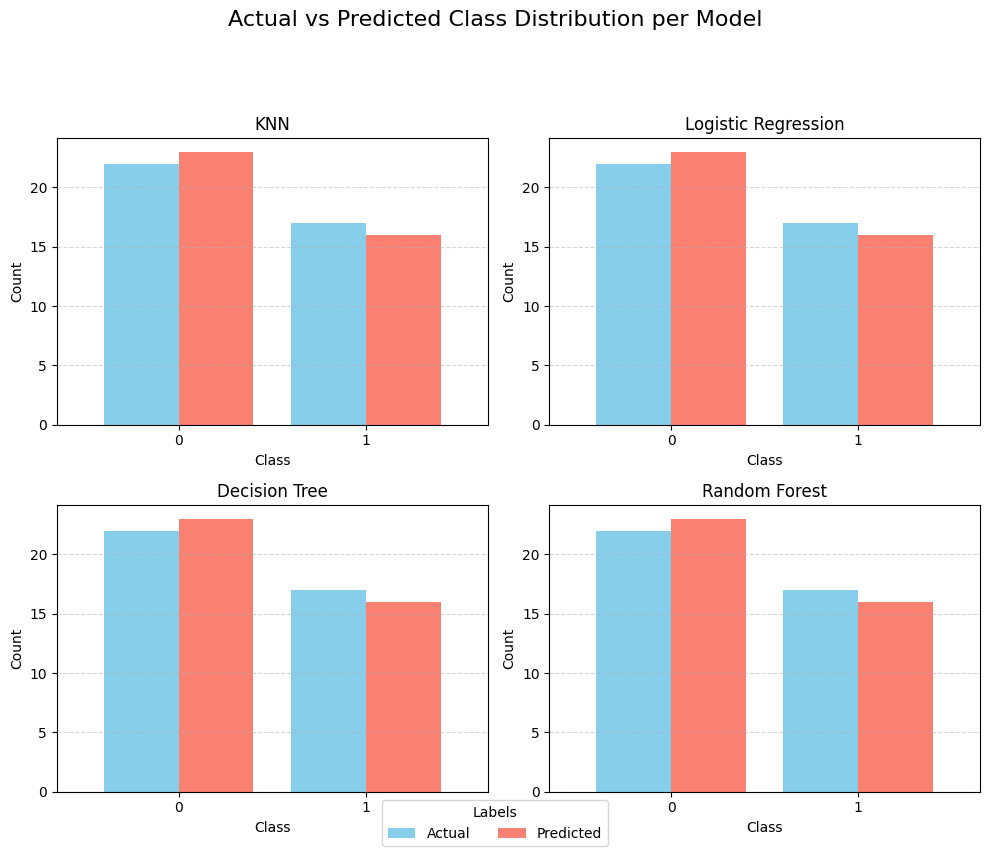

In [35]:
import math
import matplotlib.pyplot as plt

# Number of models
n_models = len(actual_vs_predicted)
n_cols = math.ceil(math.sqrt(n_models))
n_rows = math.ceil(n_models / n_cols)

# Create a figure and axes grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()  # Flatten for easy iteration

# Plot each model's bar chart in its subplot
for i, (name, df) in enumerate(actual_vs_predicted.items()):
    ax = axes[i]
    
    # Get class counts
    actual_counts = df['Actual'].value_counts().sort_index()
    pred_counts = df['Predicted'].value_counts().sort_index()
    comparison_df = pd.DataFrame({'Actual': actual_counts, 'Predicted': pred_counts})

    # Plot as side-by-side bars
    comparison_df.plot(kind='bar', ax=ax, color=['skyblue', 'salmon'], width=0.8, legend=False)
    ax.set_title(f"{name}")
    ax.set_xlabel("Class")
    ax.set_ylabel("Count")
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.tick_params(axis='x', rotation=0)

# Turn off unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add single shared legend outside plot
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title="Labels", loc="lower center", ncol=2)

plt.suptitle("Actual vs Predicted Class Distribution per Model", fontsize=16, y=1.05)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

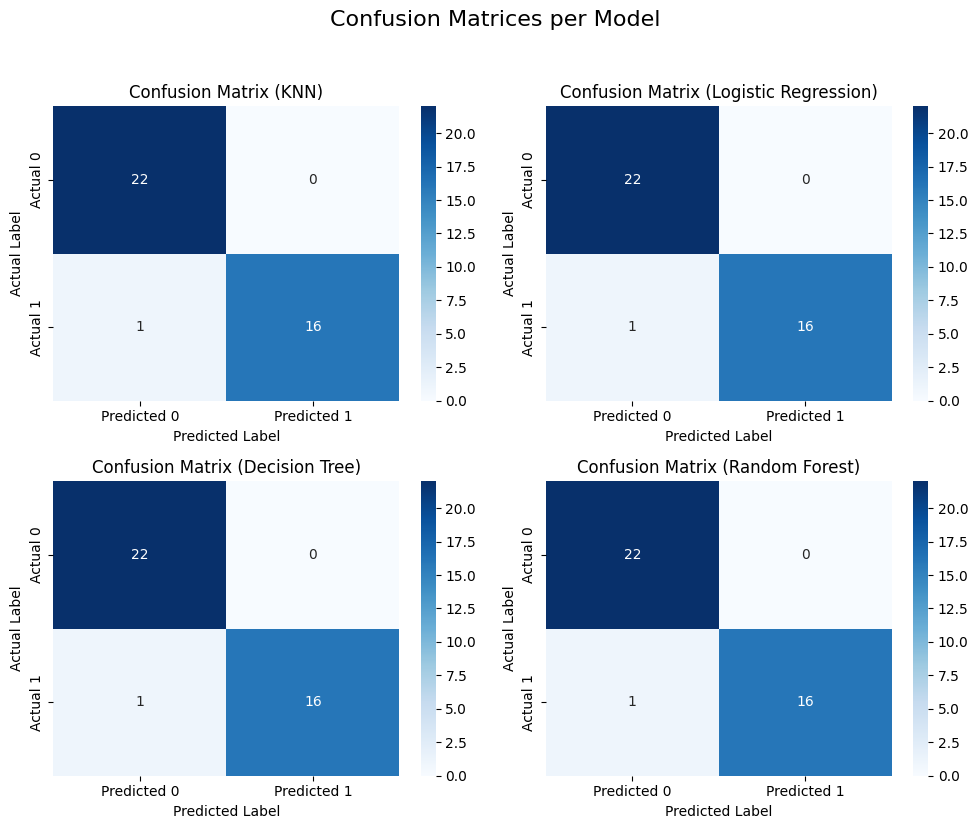

In [36]:
import math
from sklearn.metrics import confusion_matrix

# Number of models
n_models = len(actual_vs_predicted)
n_cols = math.ceil(math.sqrt(n_models))
n_rows = math.ceil(n_models / n_cols)


# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

# Plot confusion matrix per model
for i, (name, df) in enumerate(actual_vs_predicted.items()):
    ax = axes[i]
    
    cm = confusion_matrix(df['Actual'], df['Predicted'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=[f'Predicted {label}' for label in np.unique(df['Predicted'])],
                yticklabels=[f'Actual {label}' for label in np.unique(df['Actual'])])
    
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title(f'Confusion Matrix ({name})')

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Confusion Matrices per Model", fontsize=16, y=1.03)
plt.tight_layout()
plt.show()


# Addition exploration of actual and prediction & metrices

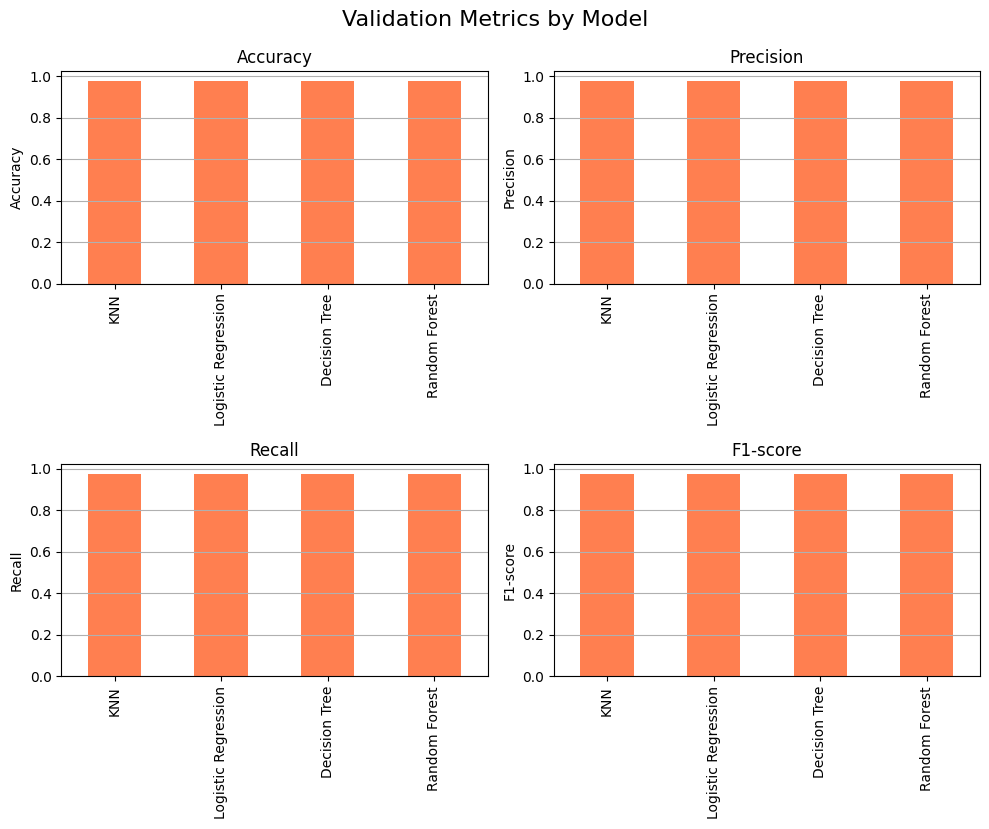

In [37]:
metric_names = metrics_df.columns.tolist()
n_metrics = len(metric_names)
n_cols = math.ceil(math.sqrt(n_metrics))
n_rows = math.ceil(n_metrics / n_cols)

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, metric in enumerate(metric_names, start=1):
    plt.subplot(n_rows, n_cols, i)
    metrics_df[metric].plot(kind='bar', color='coral')
    plt.title(metric)
    plt.ylabel(metric)
    plt.xticks(rotation=90)
    plt.grid(axis='y')

plt.tight_layout()
plt.suptitle("Validation Metrics by Model", fontsize=16, y=1.03)
plt.show()
